In [128]:
### Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# For unix timestamps
from datetime import datetime

In [129]:
### Import the 'KS_train_data.csv' file into a Pandas DataFrame
df = pd.read_csv('KS_train_data.csv',delimiter=',')

In [130]:
### Make functions

# Get continent from country
def GetConti(country):
    if country in UN:
        return "?"
    elif country in AF:
        return "AF"
    elif country in AN:
        return "AN"
    elif country in AS:
        return "AS"
    elif country in EU:
        return "EU"
    elif country in NA:
        return "NA"
    elif country in OC:
        return "OC"
    elif country in SA:
        return "SA"
    else:
        return "other"
    
# Get ratio from (sub)category
def GetRatio(name,what):
    if what == 's':
        return subcatRatio[name]
    elif what == 'c':
        return catRatio[name]

In [131]:
### Do column stuff

# The imported dataframe's column headers
cols = df.columns

# The removed columns in the testdata
notInTestCols = ['funded', 'pledged', 'usd_pledged', 'converted_pledged_amount', 'backers_count']

# The columns containing unix timestamps
unixcols = ['created_at','deadline', 'launched_at']

# The total cols (in test data set) = cols + extra made
totalCols = list(cols)
print(totalCols)
totalCols.extend(['category_numeric','country_numeric','continent_numeric','subcatRatio','catRatio'])
totalCols = [x for x in totalCols if x not in notInTestCols]

['project_id', 'backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'created_at', 'currency', 'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged', 'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory', 'project_url', 'reward_url']


In [132]:
### Necessary lists 

# Africa
AF = ['AO','BF','BI','BJ','BW','CD','CF','CG','CI','CM','CV','DJ','DZ','EG','EH','ER','ET','GA','GH','GM','GN','GQ','GW','KE','KM','LR','LS','LY','MA','MG','ML','MR','MU','MW','MZ','NA','NE','NG','RE','RW','SC','SD','SH','SL','SN','SO','SS','ST','SZ','TD','TG','TN','TZ','UG','YT','ZA','ZM','ZW']

# Antarctica
AN = ['AQ','BV','GS','HM','TF']

# Asia
AS = ['AE','AF','AM','AP','AZ','BD','BH','BN','BT','CC','CN','CX','CY','GE','HK','ID','IL','IN','IO','IQ','IR','JO','JP','KG','KH','KP','KR','KW','KZ','LA','LB','LK','MM','MN','MO','MV','MY','NP','OM','PH','PK','PS','QA','SA','SG','SY','TH','TJ','TL','TM','TW','UZ','VN','YE']

# Europe
EU = ['AD','AL','AT','AX','BA','BE','BG','BY','CH','CZ','DE','DK','EE','ES','EU','FI','FO','FR','FX','GB','GG','GI','GR','HR','HU','IE','IM','IS','IT','JE','LI','LT','LU','LV','MC','MD','ME','MK','MT','NL','NO','PL','PT','RO','RS','RU','SE','SI','SJ','SK','SM','TR','UA','VA','XK']

# North America
NA = ['AG','AI','AN','AW','BB','BL','BM','BS','BZ','CA','CR','CU','DM','DO','GD','GL','GP','GT','HN','HT','JM','KN','KY','LC','MF','MQ','MS','MX','NI','PA','PM','PR','SV','TC','TT','US','VC','VG','VI']

# Oceania
OC = ['AS','AU','CK','FJ','FM','GU','KI','MH','MP','NC','NF','NR','NU','NZ','PF','PG','PN','PW','SB','TK','TO','TV','UM','VU','WF','WS']

# South America
SA = ['AR','AW','BO','BR','BQ','CL','CO','CW', 'EC','FK','GF','GY','PE','PY','SR','SX','UY','VE']

# Unknown Country, Unknown Continent: in case you did for got to run the country code, nan is also here.
UN = ['?',np.nan]

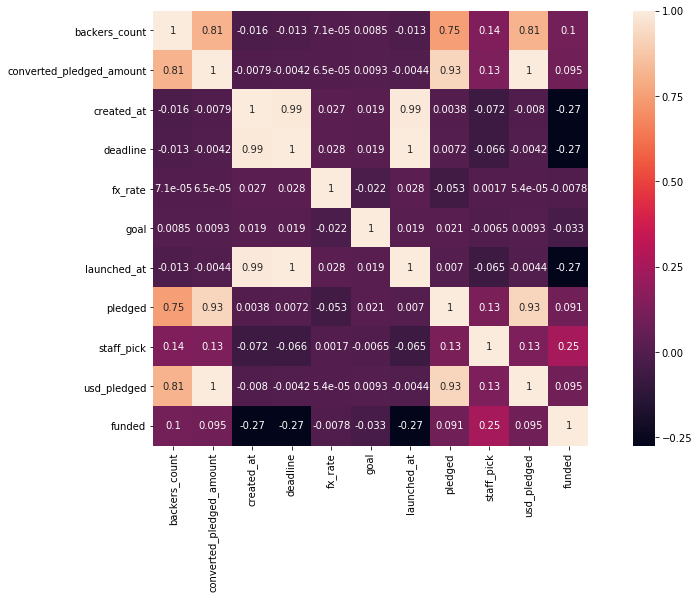

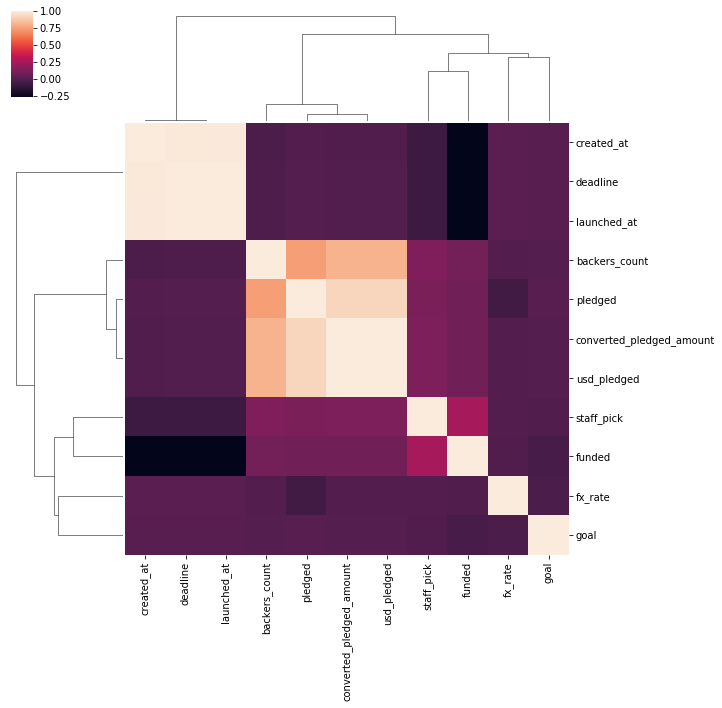

In [133]:
# The Pearson correlation matrix assumes continuous variables.
sns.heatmap(df[cols].corr(), square = True, annot = True);
sns.clustermap(df.corr());

In [134]:
### Handle missing values
#df[cols].isnull().sum()

# Fill in the missing country values
df.loc[df['country'].isnull(),'country']
df['country'] = df['country'].fillna('?');

In [135]:
### Make numeric values

# Make new category_numeric column, represented by a numeric value
df.category = pd.Categorical(df.category)
df['category_numeric'] = df.category.cat.codes

# Make new country_numeric column, represented by a numeric value
df.country = pd.Categorical(df.country)
df['country_numeric'] = df.country.cat.codes

# Make new continent_numeric column, remove unknowns
df['continent_numeric'] = df['country'].apply(lambda x: GetConti(x))

df = df[df.continent_numeric != '?']
df = df[df.continent_numeric != 'other']

df.continent_numeric = pd.Categorical(df.continent_numeric)
df['continent_numeric'] = df.continent_numeric.cat.codes

# Counts the numbers of countries in a continent
#df.groupby('continent_numeric').count()

In [136]:
### Create ratio's

# Funded subcategory / amount in a subcategory
subcat = df.groupby(['subcategory'])['subcategory'].count()
fundedSubcats = df.groupby(['subcategory'])['funded'].sum()
subcatRatio = fundedSubcats/subcat
df['subcatRatio'] = df['subcategory'].apply(lambda x: GetRatio(x,'s'))

# Funded category / amount in a category
cat = df.groupby(['category'])['category'].count()
fundedCats = df.groupby(['category'])['funded'].sum()
catRatio = fundedCats/cat
df['catRatio'] = df['category'].apply(lambda x: GetRatio(x,'c'))

# Counts the numbers of countries in a continent
# df.groupby('continent_code').count()

In [137]:
df['catRatio']

0        0.557958
1        0.557958
2        0.557958
3        0.557958
4        0.557958
5        0.557958
6        0.557958
7        0.557958
8        0.557958
9        0.557958
10       0.557958
11       0.557958
12       0.557958
13       0.557958
14       0.557958
15       0.557958
16       0.557958
17       0.557958
18       0.557958
19       0.557958
20       0.557958
21       0.557958
22       0.557958
23       0.557958
24       0.557958
25       0.557958
26       0.557958
27       0.557958
28       0.557958
29       0.557958
           ...   
99970    0.750378
99971    0.750378
99972    0.750378
99973    0.750378
99974    0.750378
99975    0.750378
99976    0.750378
99977    0.750378
99978    0.750378
99979    0.750378
99980    0.750378
99981    0.750378
99982    0.750378
99983    0.750378
99984    0.750378
99985    0.750378
99986    0.750378
99987    0.750378
99988    0.750378
99989    0.750378
99990    0.750378
99991    0.750378
99992    0.750378
99993    0.750378
99994    0

In [138]:
# Investigating '?' countries

#df['continent_code'].isnull()
#df.loc[df['continent_code'].isnull(),'location']
#df.blurb[862]
#843      ?
#847      ?
#851      ?
#852      ?
#853      ?
#856      ?
#858      ?
#862      ?

In [139]:
### UNIX TIMESTAMPS
# unixcols contains unix timestamps (made at the beginning of the file)

df['date_created_at'] = pd.to_datetime(df[unixcols[0]],unit='s')
#df['time_created_at'] =

df['date_deadline'] = pd.to_datetime(df[unixcols[1]],unit='s')
#df['time_deadline'] =

df['date_launched_at'] = pd.to_datetime(df[unixcols[2]],unit='s')
#df['time_launched_at'] =

#timestamp = datetime.datetime.fromtimestamp(1500000000)
#print(timestamp)
#print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
#datetime.datetime.fromtimestamp(df.deadline[1]).strftime('%Y-%m-%d %H:%M:%S')

In [140]:
#df['date'] = pd.to_datetime(df['deadline'],unit='s')
df.head()

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,project_url,reward_url,category_numeric,country_numeric,continent_numeric,subcatRatio,catRatio,date_created_at,date_deadline,date_launched_at
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,0,162,4,0.451047,0.557958,2012-01-07 23:55:05,2012-04-19 20:16:00,2012-03-28 21:14:20
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...,0,162,4,0.679054,0.557958,2012-03-05 05:41:24,2012-05-08 01:22:25,2012-03-29 01:22:25
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...,0,162,4,0.481446,0.557958,2012-03-22 02:21:34,2012-05-28 03:28:59,2012-03-29 03:28:59
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...,0,56,3,1.000000,0.557958,2012-03-21 15:07:31,2012-04-19 03:28:16,2012-03-29 03:28:16
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...,0,162,4,0.679054,0.557958,2012-02-06 21:10:17,2012-04-28 03:37:20,2012-03-29 03:37:20


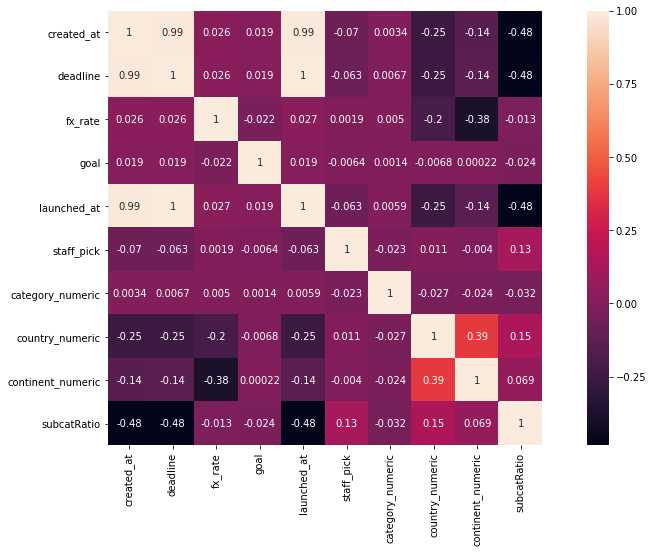

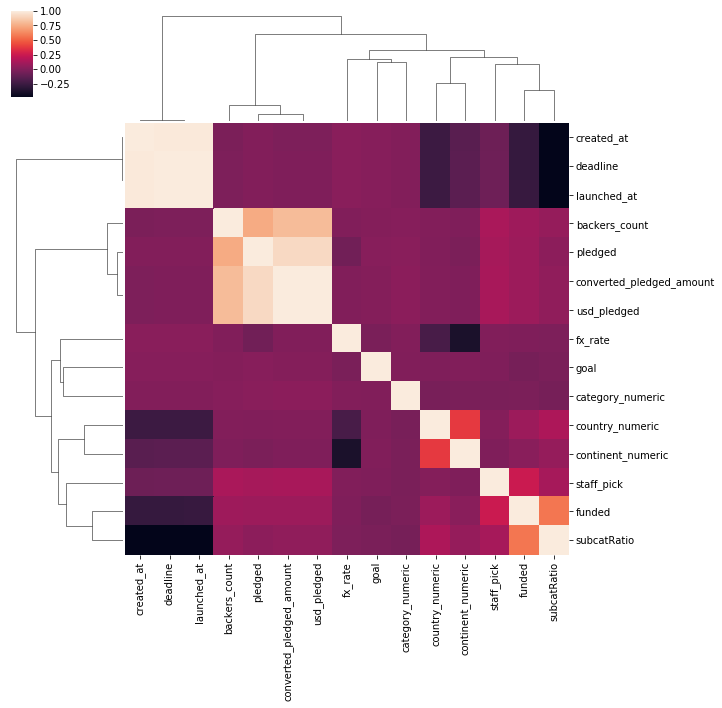

In [141]:
# The Pearson correlation matrix assumes continuous variables.
sns.heatmap(df[totalCols].corr(), square = True, annot = True);
#sns.clustermap(df.corr());